# Weekly assignment 1-3  -Roos van Velzen

Data cleaning:
    Read in and merge the two data sets (tip: think of different CSV formats that exist)


In [1]:
#Introduction (see last week)
#Data cleaning (see last week)

import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #This is the linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

df1 = pd.read_csv('steps.csv', delimiter= ";")
df2 = pd.read_csv('survey.csv')
df3 = pd.merge(df2, df1, on = 'id')


# Clean the data: remove impossible values

In [2]:
df3.drop(df3[df3['weight']<=44].index, inplace=True)
df3.drop(df3[df3['weight']>=200].index, inplace=True)

df3.drop(df3[df3['height']<=100].index, inplace=True)
df3.drop(df3[df3['height']>=210].index, inplace=True)

df3 = df3.fillna(0)

Create the variable mean steps per participant. Hint: combine Pandas .loc and .mean() with the right axis argument (axis=....) for mean(). Look up the documentation of .loc and Pandas .mean() if you're unsure. 
Show the head() of the resulting data frame

In [3]:
steps_per_participant = df3.loc[:,'20-6-2013':'13-5-2014'].mean(axis=1)
df3["Average-steps"] = steps_per_participant


df3.drop(df3[df3['Average-steps']>=19430].index, inplace=True)
df3.drop(df3[df3['Average-steps']<=500].index, inplace=True)
df3.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,Average-steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5133.875000
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2826.371951
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0,3745.902439
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,874.557927
5,6,Lille,Male,35-44,1,1,Vocational,170.0,63.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5554.884146


Height data cleaning

/Users/roosvanvelzen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/roosvanvelzen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


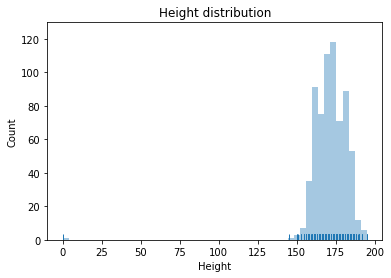

In [4]:
sns.distplot(df3['height'].dropna(), kde=False, rug=True) 
plt.title('Height distribution')
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

In [5]:
df3 = df3[df3['height'] > 150]

Weight data cleaning 

/Users/roosvanvelzen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/roosvanvelzen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


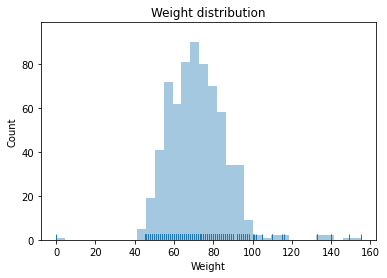

In [6]:
sns.distplot(df3['weight'].dropna(), kde=False, rug=True) 
plt.title('Weight distribution')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()   

In [7]:
df3 = df3[(df3['weight'] < 200) & (df3['weight'] > 40)]

Average_steps data cleaning 

/Users/roosvanvelzen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/roosvanvelzen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


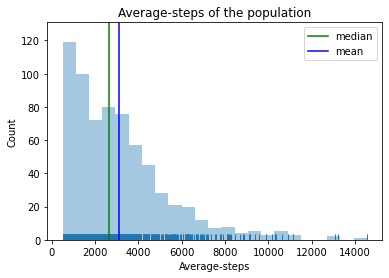

In [8]:
mean_steps = df3['Average-steps'].mean()
median_steps = df3['Average-steps'].median()

sns.distplot(df3['Average-steps'].dropna(), kde=False, rug=True)
plt.title('Average-steps of the population')
plt.axvline(median_steps, 0, 100, color='green', label='median') 
plt.axvline(mean_steps, 0, 100, color='blue', label='mean')
plt.ylabel('Count')
plt.legend()
plt.show()

Summary statistics (measure of central tendency and variation, e.g., mean, median, standard deviation)

In [9]:
df3["Average-steps"].describe()

count      668.000000
mean      3107.176701
std       2254.483706
min        506.402439
25%       1355.846037
50%       2636.987805
75%       4110.155488
max      14538.682927
Name: Average-steps, dtype: float64

Verbal description of the distribution, including commenting on normality, skewness, outliers, etc.




The population has an uneven distrubition to the left, Both halves contain an unequal number of observations, Right skewed distributions occur when the long tail is on the right side of the distribution. al so known as positively skewed.  you’ll find extreme values, the outliers, far from the peak on the high end more frequently than on the low.

Most people are not that active, but some athletes extend the right tail into very high values. Meanwhile, the left tail cannot be less than zero. This situation creates a positive skew.

# Exploratory data analysis - Week 2
The relation of mean steps per participant with two categorical variables (e.g. gender, age, education). Graph of the relation (e.g. histograms, box plots, density plots, violin plots). Try a different plot this time.

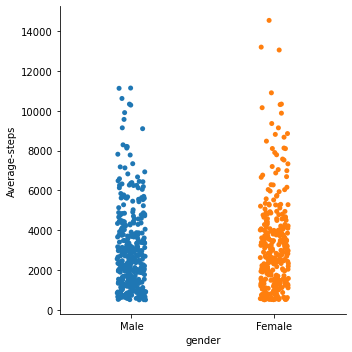

In [10]:
steps_gender = df3
sns.catplot(data=steps_gender, x="gender", y="Average-steps")

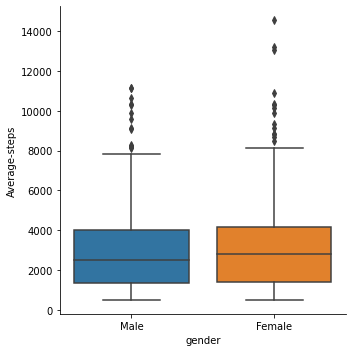

In [11]:
sns.catplot(data=steps_gender, x="gender", y="Average-steps", kind="box")

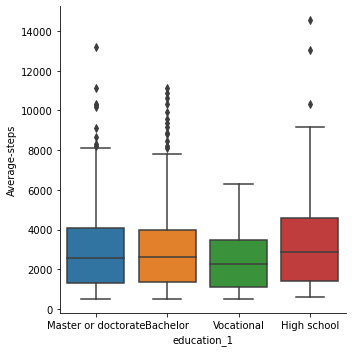

In [12]:
df4 = df3[df3["education_1"].str.contains("Master|High school|Bachelor|Vocational")]
sns.catplot(data=df4, x="education_1", y="Average-steps", kind="box")


Describe and interpret the results:

As you can see the females in this population have an higher average the the male population, and people who did high school have a higher average in steps. 

The prediction of the model can be improved by computing a variable that gives a better indication of a healthy 
weight than weight alone. Can you think of one? If not, just skip this step.




In [13]:
BMI = df3["weight"]/((df3["height"]/100)*(df3["height"]/100)).round(2)
df3["BMI"] = BMI
df3 = df3[df3["BMI"] <= 60]

df3.drop(df3[df3['BMI']<=10].index, inplace=True)
df3.drop(df3[df3['BMI']>=60].index, inplace=True)
df3

/Users/roosvanvelzen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,Average-steps,BMI
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5133.875000,30.914826
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2826.371951,23.765432
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0,3745.902439,25.617284
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,874.557927,21.863799
5,6,Lille,Male,35-44,1,1,Vocational,170.0,63.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5554.884146,21.799308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1742.908537,21.691176
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,731.689024,24.390244
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6268.954268,21.646341
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3872.115854,21.959459


Make a scatterplot matrix of the numerical variables.




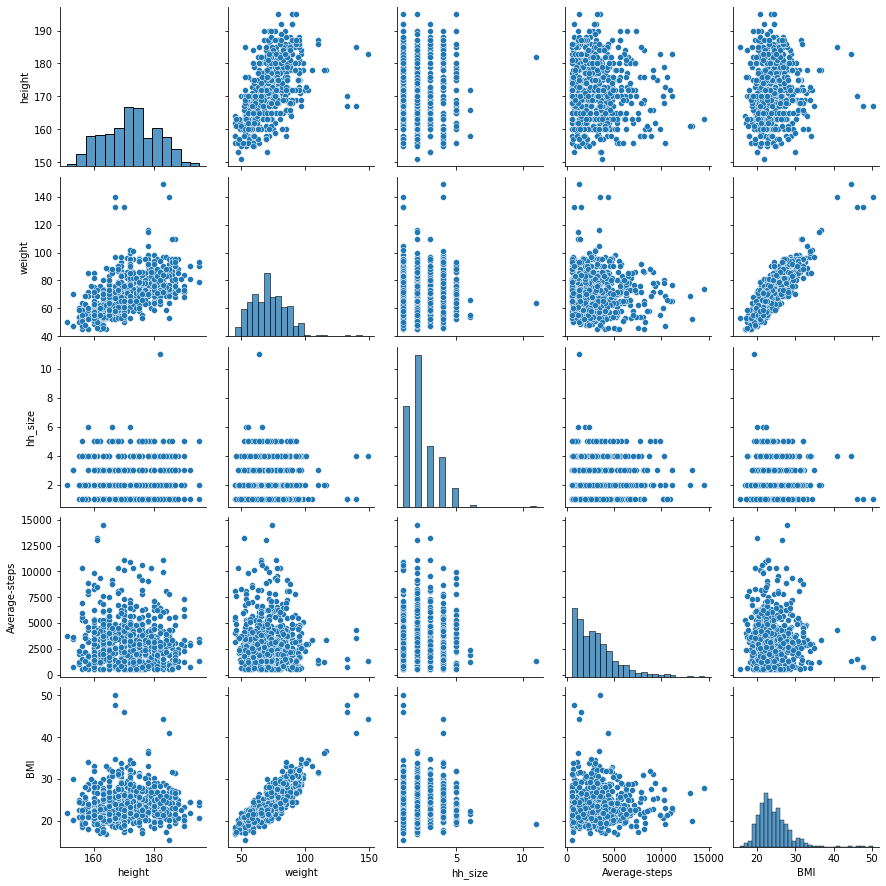

In [14]:
subset1= df3[['height','weight','hh_size','Average-steps', 'BMI']]
sns.pairplot(subset1)
plt.show()

Make a correlation matrix of the numerical variables.




In [15]:
corr = subset1.corr()
corr.style.background_gradient(cmap='coolwarm')

,height,weight,hh_size,Average-steps,BMI
height,1.000000,0.557748,-0.020208,-0.107778,0.066419
weight,0.557748,1.000000,0.008584,-0.082915,0.861551
hh_size,-0.020208,0.008584,1.000000,0.032352,0.017994
Average-steps,-0.107778,-0.082915,0.032352,1.000000,-0.033034
BMI,0.066419,0.861551,0.017994,-0.033034,1.000000


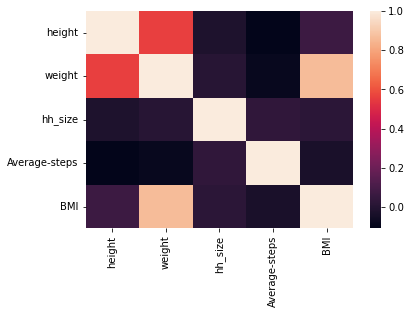

In [16]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

Describe and interpret the results:

The graphs show that the BMI has a string correltion with weight. As the graph shows a movement to the upper right corner. Now we also see no correlation in BMI and Average steps. However we seen that the dots are neatly gather in the middle saying there is a health population. However if you look at BMI and Average steps people having a lower step average do have either a BMI which is to high or to low, in that turn it means unhealthy body mass index. Same with the average step and weight, the hight the weight the lower the average. 

Further more looking at Height and Weight. There is a small correlation. But to minimal to draw conclusion from, you could conclude the population has a average height and weight compared to one and other. 

Lastly there is absolutly no correlation between Average-steps and height. As the nods are scatterd and their is no clear correltion or figure. 

# Week 3 

Predictive model
Explain linear regression in your own words

Linear regression is the line that "fits" the observations. The line that fits is a line that is equal to Y = mX + b, where Y is the response (dependent) variable, X is the predictor (independent) variable, m is the estimated slope, and b is the estimated intercept.


# Create dummy variables for the categorical variables
Fit a linear regression model to predict the mean steps per participant, using the training data. You can include all variables (easy), or you can try to find the combination that gives you the best fit (harder).


In [17]:
#education_1 / age / gender are categorical varibles

education_1_dummies = pd.get_dummies(df3['education_1'])
df3 = pd.concat([df3, education_1_dummies], axis=1) 

age_dummies = pd.get_dummies(df3['age'])
df3 = pd.concat([df3, age_dummies], axis=1) 

gender_dummies = pd.get_dummies(df3['gender'])
df3 = pd.concat([df3, gender_dummies], axis=1) 

df3.drop(df3.loc[:,'20-6-2013':'13-5-2014'], inplace=True, axis=1) 
df3

,id,city,gender,age,hh_size,education,education_1,height,weight,Average-steps,...,Primary,Vocational,25-34,35-44,45-54,55-64,65+,<25,Female,Male
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,5133.875000,...,0,0,1,0,0,0,0,0,0,1
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,2826.371951,...,0,0,0,1,0,0,0,0,0,1
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,3745.902439,...,0,0,1,0,0,0,0,0,0,1
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,874.557927,...,0,0,1,0,0,0,0,0,1,0
5,6,Lille,Male,35-44,1,1,Vocational,170.0,63.0,5554.884146,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,1742.908537,...,0,0,0,0,1,0,0,0,1,0
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0,731.689024,...,0,0,0,0,0,0,0,1,0,1
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,6268.954268,...,0,0,0,1,0,0,0,0,0,1
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0,3872.115854,...,0,0,0,0,0,1,0,0,1,0


In [18]:
corr["Average-steps"]
corr = df3.corr()
corr.style.background_gradient(cmap='coolwarm')


,id,hh_size,education,height,weight,Average-steps,BMI,Bachelor,High school,Master or doctorate,No degree,Primary,Vocational,25-34,35-44,45-54,55-64,65+,<25,Female,Male
id,1.000000,0.013700,0.005055,0.025665,0.003626,0.011443,-0.008566,0.013778,0.037461,-0.013012,-0.056668,-0.020357,-0.041072,-0.019254,0.064618,-0.047691,-0.024142,0.050912,0.010601,-0.032521,0.032521
hh_size,0.013700,1.000000,0.814559,-0.020208,0.008584,0.032352,0.017994,-0.040783,0.068545,0.007838,-0.010661,0.008150,-0.033192,-0.220445,0.212108,0.058715,-0.055964,0.037070,0.044898,-0.006239,0.006239
education,0.005055,0.814559,1.000000,-0.023283,-0.002480,0.002146,0.002792,-0.007463,0.065262,-0.021549,-0.016453,-0.008812,-0.024718,-0.177336,0.145461,0.072938,-0.067567,0.042358,0.049911,-0.002196,0.002196
height,0.025665,-0.020208,-0.023283,1.000000,0.557748,-0.107778,0.066419,-0.081098,-0.139823,0.200173,0.057096,-0.110631,-0.042022,0.053437,-0.000958,-0.055049,-0.085451,0.040130,0.029298,-0.711715,0.711715
weight,0.003626,0.008584,-0.002480,0.557748,1.000000,-0.082915,0.861551,-0.067120,0.022909,0.074022,0.000483,-0.095148,-0.011207,-0.072510,0.016541,0.074839,-0.016483,0.060844,0.005224,-0.438238,0.438238
Average-steps,0.011443,0.032352,0.002146,-0.107778,-0.082915,1.000000,-0.033034,-0.007307,0.067098,-0.029210,-0.018681,0.054001,-0.041587,-0.075063,0.067527,0.051968,0.168896,-0.021568,-0.132534,0.047886,-0.047886
BMI,-0.008566,0.017994,0.002792,0.066419,0.861551,-0.033034,1.000000,-0.030348,0.111209,-0.032589,-0.030095,-0.052181,0.013244,-0.125132,0.019682,0.131484,0.039809,0.045505,-0.015657,-0.093747,0.093747
Bachelor,0.013778,-0.040783,-0.007463,-0.081098,-0.067120,-0.007307,-0.030348,1.000000,-0.270032,-0.723120,-0.029620,-0.078723,-0.147682,-0.039092,0.022028,-0.088593,-0.011662,-0.051381,0.152551,0.095292,-0.095292
High school,0.037461,0.068545,0.065262,-0.139823,0.022909,0.067098,0.111209,-0.270032,1.000000,-0.334174,-0.013688,-0.036380,-0.068248,-0.069584,-0.026680,0.105738,0.010047,0.047596,0.003477,0.138718,-0.138718
Master or doctorate,-0.013012,0.007838,-0.021549,0.200173,0.074022,-0.029210,-0.032589,-0.723120,-0.334174,1.000000,-0.036656,-0.097423,-0.182761,0.149237,-0.056812,-0.012538,-0.029684,-0.018706,-0.123691,-0.203921,0.203921


# Buidling the Model 

In [19]:
y = df3['Average-steps'] #We need to take out the rating as our Y-variable
X = df3[['height', 'weight', 'Bachelor', 'High school', 'Master or doctorate', 'Primary', 'Vocational', '25-34', '35-44', '45-54', '55-64', '65+', 'Male']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model
y_test_p = lm.predict(X_test) 
X_train.head() #The train data

,height,weight,Bachelor,High school,Master or doctorate,Primary,Vocational,25-34,35-44,45-54,55-64,65+,Male
53,170.0,75.0,0,0,1,0,0,1,0,0,0,0,1
487,183.0,85.0,0,0,1,0,0,1,0,0,0,0,1
706,182.0,83.0,0,0,1,0,0,1,0,0,0,0,1
340,172.0,79.0,1,0,0,0,0,1,0,0,0,0,1
214,170.0,71.0,0,0,1,0,0,0,0,1,0,0,1


# Evaluation
    Evaluate the model on the test data
        Predictive power of the model (R2, RMSE)
        
 The R2 tells us how well a regression line predicts actual values. 


/Users/roosvanvelzen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


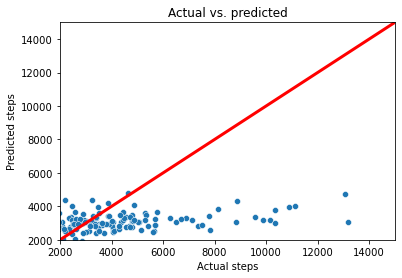

In [20]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual steps')
plt.ylabel('Predicted steps')
plt.title('Actual vs. predicted')
plt.xlim([2000,15000]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([2000,15000])
plt.plot([2000, 15000], [2000, 15000], color='red', lw=3) #Plot a diagonal length
plt.show()

/Users/roosvanvelzen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


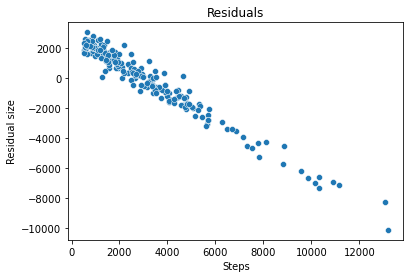

In [21]:
resid = y_test_p - y_test
sns.scatterplot(y_test, resid)
plt.title('Residuals')
plt.xlabel('Steps')
plt.ylabel('Residual size')
plt.show()

In [22]:
r2_score(y_test, y_test_p)

0.0834346975161514


        Investigate the residuals
        Describe and interpret the results

The *r<sup>2</sup>* score of 0.08 indicates that the model is able to predict 8% of the variation. This is very low, meaning that the model does not predict the mean steps well.

In [23]:
math.sqrt(mean_squared_error(y_test, y_test_p))

2376.417843945997

The RMSE is 2376, which means that the model is typically of by about 2376 steps. If the model would only use the mean and no variables at all, the RMSE would be equal to the standard deviation. The standard deviation is:

In [24]:
df3['Average-steps'].std()

2255.878438414649

# Conclusion

I tried to model the daily mean steps with several variables using a linear regression model. The exploratory analysis showed that the variables were not really related to mean steps. Correspondingly, r<sup>2</sup> was 0.08 and the RMSE was 2376 steps, indicating a poor fit. Apparently, mean steps can not be predicted from demographic variables, height and weight, at least in this sample